In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred = knn.predict(X_test)

In [6]:
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 70.00%


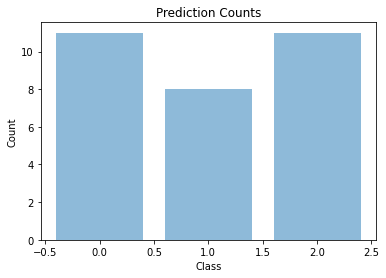

In [7]:
unique, counts = np.unique(y_pred, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Prediction Counts")
plt.show()

In [8]:
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
prediction = knn.predict(np.array([[sepal_length, sepal_width]]))[0]
print("The flower belongs to class: ", prediction)

Enter sepal length: 55
Enter sepal width: 61
The flower belongs to class:  2


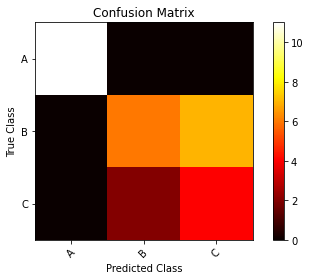

In [9]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in "ABC"],
                  columns=[i for i in "ABC"])
plt.imshow(cm, cmap='hot')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['A', 'B', 'C'], rotation=45)
plt.yticks(tick_marks, ['A', 'B', 'C'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
